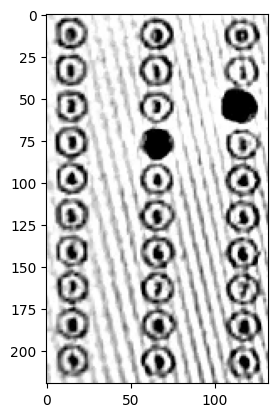

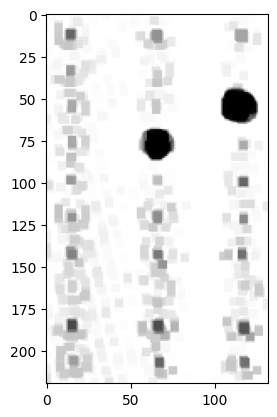

In [72]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import imutils

image = cv2.imread("static_2024_transformed_6208022004_1~bubbleSheet3.webp")
def cv2_imshow(cv2image):
    plt.imshow(cv2.cvtColor(cv2image, cv2.COLOR_BGR2RGB))
    plt.show()
    
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)
kernel = np.ones((5,5),np.uint8)
gray = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)
cv2_imshow(gray)

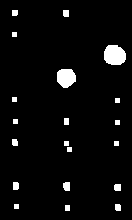

(220, 132)


In [48]:
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
display(Image.fromarray(thresh))
print(thresh.shape)

19 19
22 20
Found 20 contours
Found 2 bubbleCnts


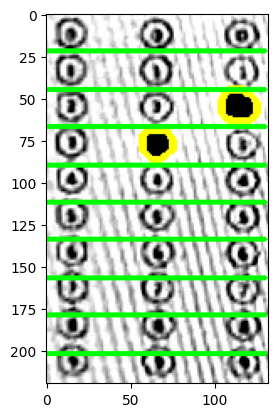

In [49]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
bubbleCnts = []
# loop over the contours
for c in cnts:
    # compute the bounding box of the contour, then use the
    # bounding box to derive the aspect ratio
    (x, y, w, h) = cv2.boundingRect(c)
    ar = w / float(h)
    # in order to label the contour as a question, region
    # should be sufficiently wide, sufficiently tall, and
    # have an aspect ratio approximately equal to 1
    # if ar >= 1.0 and ar <= 1.5:
    #     questionCnts.append(c)
    
    if w >= 12 and h >= 12:
        print(w,h)
        bubbleCnts.append(c)
    # if w >= 20 and h >= 20 and ar >= 0.9 and ar <= 1.1:
    #     questionCnts.append(c)
print("Found {} contours".format(len(cnts)))
print("Found {} bubbleCnts".format(len(bubbleCnts)))

with_contours = cv2.drawContours(image.copy(), bubbleCnts, -1, (0, 255, 255), 3)
line_thickness = 2
step = 224 / 10
y = 0
for index in range(0,10):
    y += step
    cv2.line(with_contours, (0, round(y)), (130, round(y)), (0, 255, 0), thickness=line_thickness)
    
cv2_imshow(with_contours)

In [71]:
sorted_by_x = sorted(bubbleCnts, key=lambda ctr: cv2.boundingRect(ctr)[0])
sorted_by_y = sorted(bubbleCnts, key=lambda ctr: cv2.boundingRect(ctr)[1])

step_x = 224 / 10
step_y = 132 / 3

steps_y: list[float] = [index * step_x for index in range(0, 9)]
steps_x: list[float] = [index * step_y for index in range(0, 3)]

for bubble in sorted_by_x:
    (x, y, w, h) = cv2.boundingRect(bubble)
    differences = [abs(step - x) for step in steps_x]
    minimal = differences.index(min(differences))
    print(minimal)
    print(differences)


for bubble in sorted_by_y:
    (x, y, w, h) = cv2.boundingRect(bubble)
    print(y)
    # print(y)
    # differences = [abs(step_y - y) for step in steps_y]
    # print(differences)
    # minimal = differences.index(min(differences))
    # print(minimal)
    

    
# for bubble in sorted_by_y:
#     (x, y, w, h) = cv2.boundingRect(bubble)
#     
#     differences = [abs(step_x - y) for step in steps_x]
#     minimal = differences.index(min(differences))
#     print(differences)
#     # print(minimal)
    

1
[57.0, 13.0, 31.0]
2
[104.0, 60.0, 16.0]
45
69


In [51]:
from typing import Optional, List


def group_to_number(group) -> Optional[int]:
    if len(group) != 10:
        return None
    
    sorted_by_y = sorted(group, key=lambda ctr: cv2.boundingRect(ctr)[1])
    most_filled = (0,0)
    second_most_filled = (0,0)
    for idx, cont in enumerate(sorted_by_y):
        mask = np.zeros(thresh.shape, dtype="uint8")
        cv2.drawContours(mask, [cont], -1, 255, -1)
        mask = cv2.bitwise_and(thresh, thresh, mask=mask)
        total = cv2.countNonZero(mask)
    
        if total > most_filled[1]:
            most_filled = (idx, total)
        elif total > second_most_filled[1]:
            second_most_filled = (idx, total)
        # cv2_imshow(mask)
        # print(f"{idx}: {total} {cv2.contourArea(cont)}")
    ratio = most_filled[1] / second_most_filled[1]
    if ratio > 1.2:
        return most_filled[0]
    return 0

def extract_three_numbers(cnt):
    sorted_by_x = sorted(cnt, key=lambda ctr: cv2.boundingRect(ctr)[0])
    (previous_x, _, _, _) = cv2.boundingRect(sorted_by_x[0])

    contours = []
    contour_group = []
    for contour in sorted_by_x:
        (x, y, w, h) = cv2.boundingRect(contour)
        distance = x - previous_x
        if distance > 20:
            contours.append(contour_group)
            contour_group = []
    
        contour_group.append(contour)
        previous_x = x
    contours.append(contour_group)
    return contours
three = extract_three_numbers(bubbleCnts)

print(len(three[0]))
print(len(three[1]))
print(len(three[2]))

print(group_to_number(three[0]))
print(group_to_number(three[1]))
print(group_to_number(three[2]))


1
1


IndexError: list index out of range